<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Stuff" data-toc-modified-id="Import-Stuff-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Stuff</a></span></li><li><span><a href="#Fit-Birch-Murnaghan-Equation-of-State" data-toc-modified-id="Fit-Birch-Murnaghan-Equation-of-State-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fit Birch-Murnaghan Equation of State</a></span></li></ul></div>

# Import Stuff

In [2]:
import pickle as pkl
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from ase.eos import EquationOfState
sns.set(font_scale=1.5)

with open("tidy_data/equation_of_state_data.pkl","rb") as file_in:
    raw_data = pkl.load(file_in)
    
df = pd.DataFrame(raw_data)
df.head()

,volume,energy
0,569.041635,-427.642480
1,588.890167,-433.523506
2,609.194966,-438.109256
3,629.961218,-441.506264
4,651.194109,-443.821142


# Fit Birch-Murnaghan Equation of State

In [3]:
eos = EquationOfState(df.volume.values,df.energy.values,eos="birchmurnaghan")
V,E,B = eos.fit()
print(V)

695.3885929138214


[Text(0, 0.5, 'Energy [eV]'), Text(0.5, 0, 'Volume [cu. Ang.]')]

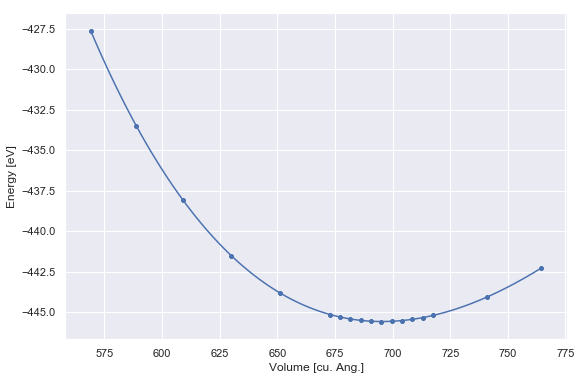

In [6]:
sns.set_context("notebook")
fig= plt.figure(figsize=(9,6))
ax = plt.gca()
plotdata = eos.getplotdata()
sns.lineplot(x=plotdata[4],y=plotdata[5],ax=ax)
sns.scatterplot(x=plotdata[6],y=plotdata[7])
#plt.title("Birch-Murnaghan Fitting",size=16)
ax.set(xlabel="Volume [cu. Ang.]",ylabel="Energy [eV]")


In [5]:
eos.v0

695.3885929138214

In [8]:
eos.B

1.1250266965891378